# Problema analisado #

Este programa trás a visualização gráfica do seguinte problema: Dados os planos $y = 0$ e $y = a$, mantidos em um potencial $V = 0$ e os planos $x = -b$ e $x = b$, mantidos em um potencial $V = V_{0}$, determine $V(x,y)$ na região interior a esses 4 planos, sabendo que está é livre de cargas.

## Solução do problema: ##

$$V(x,y) = \frac{4V_{0}}{\pi}\sum\limits_{\substack{n = 1 \\ n \text{ ímpar}}}^{\infty}\frac{1}{n}\cdot\frac{\cosh(\large{\frac{n\pi x}{a}})}{\cosh(\large{\frac{n\pi b}{a}})}\cdot\sin(\frac{n\pi y}{a})$$

### Código: ###

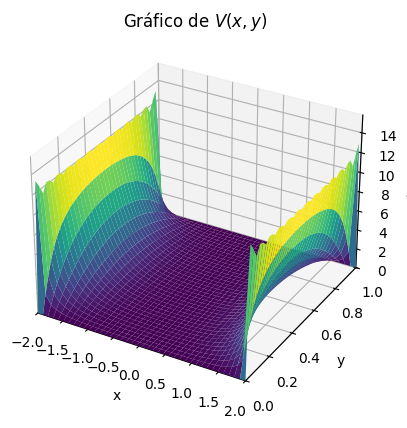

In [25]:
import numpy as np
from matplotlib import pyplot as plt

# Definindo as constantes V0, a e b:

V0 = float(input('Informe a tensão dos planos x = -b e x = b (tensão V0): '))
a = float(input('Informe a constante a: '))
b = float(input('Informe a constante b: '))

N = 51 #Limite superior do somatório, aumente para maior precisão

# Definindo a função:

def somatorio(n, a, b, x, y):
    soma = 0
    for i in range(1, n+1, 2): #Somando apenas os termos impares
        seno = np.sin(i * np.pi * y / a)
        numerador = np.cosh(i * np.pi * x / a)
        denominador = np.cosh(i * np.pi * b / a)
        soma += numerador * seno / (denominador * i)
    return soma

def V(x, y):
    return 4 * V0 * somatorio(N, a, b, x, y) / np.pi

# Definindo os intervalos de x e y:

x = np.linspace(-b, b, 40)
y = np.linspace(0, a, 40)

# Criando o espaço onde o gráfico será plotado:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V(x, y)')

ax.set_xlim(-b, b)
ax.set_ylim(0, a)

# Plotando a superficie:

X, Y = np.meshgrid(x, y)
v = V(X, Y)

if(np.min(v) < 0):
    ax.set_zlim(1.2 * np.min(v), 1.2 * np.max(v))
else:
    ax.set_zlim(0, 1.2 * np.max(v))

ax.plot_surface(X, Y, v, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

plt.title(r'Gráfico de $V(x,y)$')

plt.show()

### Visualização das curvas de nível do potencial elétrico: ###

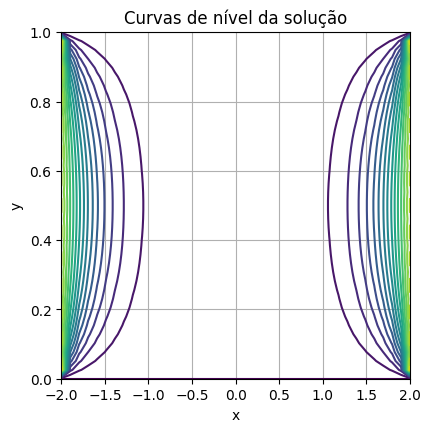

In [26]:
plt.figure(figsize=(4.5, 4.5))
contours = plt.contour(X, Y, v, 20, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
#plt.clabel(contours, inline=True, fontsize=8)
plt.title('Curvas de nível da solução')
plt.show()